# Practical Lab 3

##### No.1 Framing the Problem - Describe the goal of this report
### This report is an attempt to build 3 linear regression models to predict home prices in California based on median income, population, and number of households respectively.

##### No.2 Getting the Data - hyperlinking to the source (0.1 point) and loading into Pandas (0.1 point).

In [53]:
import pandas as pd
import kaggle
import opendatasets as od

od.download('https://www.kaggle.com/datasets/camnugent/california-housing-prices/download?datasetVersionNumber=1')
house = pd.read_csv('california-housing-prices\housing.csv')
house.head()

Skipping, found downloaded files in ".\california-housing-prices" (use force=True to force download)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### No3. Exploratory Data Analysis (EDA):
1) Explore statistics (e.g. using Pandas `describe` function) (0.2 point)

In [54]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


2) Describe the 4 variables used in this lab. Review the range of the data for each variable, and other issues you notice (0.3 point)

In [55]:
print(house[['median_income', 'population', 'households']].describe().loc['min'], end='\n\n')
print(house[['median_income', 'population', 'households']].describe().loc['max'])

median_income    0.4999
population       3.0000
households       1.0000
Name: min, dtype: float64

median_income       15.0001
population       35682.0000
households        6082.0000
Name: max, dtype: float64


3) Create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. Add a title to each graph (using Seaborn). Provide textual review of what you see in these graphs (relevant insights). (0.6 points).

[Text(0.5, 1.0, 'House Price vs Median Income')]

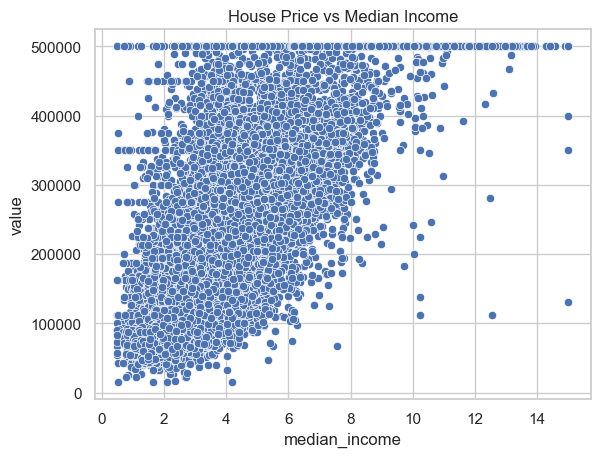

In [56]:
import seaborn as sns
sns.set_theme(style="whitegrid")

house_melt_median_income = pd.melt(house, id_vars='median_income', value_vars='median_house_value')
sns.scatterplot(data=house_melt_median_income, x='median_income', y='value').set(title='House Price vs Median Income')

[Text(0.5, 1.0, 'House Price vs Population')]

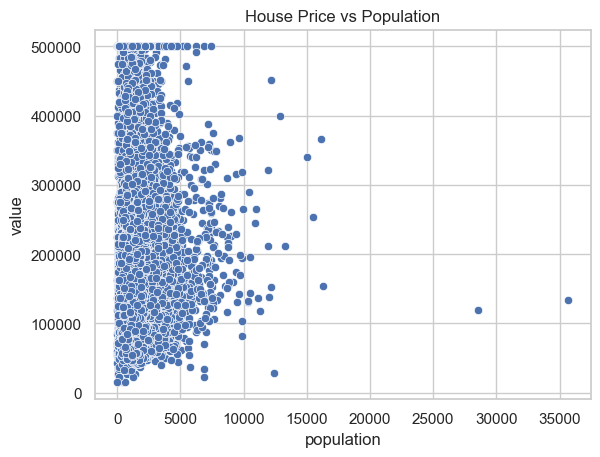

In [57]:

house_melt_population = pd.melt(house, id_vars='population', value_vars='median_house_value')
sns.scatterplot(data=house_melt_population, x='population', y='value').set(title='House Price vs Population')

[Text(0.5, 1.0, 'House Price vs Households')]

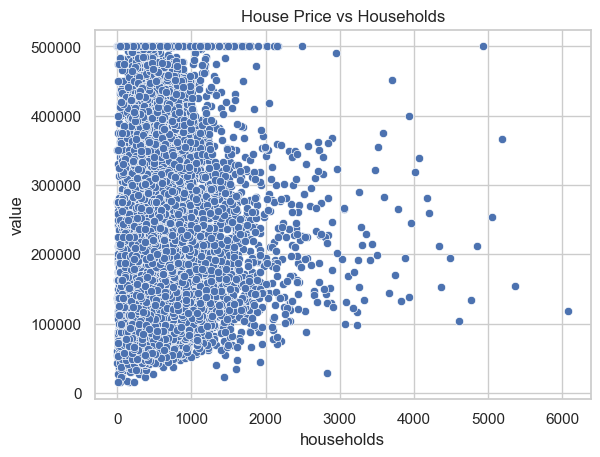

In [58]:
house_melt_households = pd.melt(house, id_vars='households', value_vars='median_house_value')
sns.scatterplot(data=house_melt_households, x='households', y='value').set(title='House Price vs Households')

##### No.4 Run three linear regressions (fitting) between (1.2 points): 

In [59]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

1) median house value vs. median income

In [60]:
x = house['median_income'].to_numpy().reshape(-1, 1)
y = house['median_house_value'].to_numpy()
x_train, x_test_median_income, y_train, y_test_median_income = train_test_split(x, y, test_size=0.2, random_state=0)

model_median_income = LinearRegression()
model_median_income.fit(x_train, y_train)
y_perd_median_income = model_median_income.predict(x_test_median_income)

2） median house value vs. population 

In [61]:
x = house['population'].to_numpy().reshape(-1, 1)
y = house['median_house_value'].to_numpy()
x_train, x_test_population, y_train, y_test_population = train_test_split(x, y, test_size=0.2, random_state=0)

model_population = LinearRegression()
model_population.fit(x_train, y_train)
y_perd_population = model_population.predict(x_test_population)

3) median house value vs. number of households.

In [62]:
x = house['households'].to_numpy().reshape(-1, 1)
y = house['median_house_value'].to_numpy()
x_train, x_test_households, y_train, y_test_households = train_test_split(x, y, test_size=0.2, random_state=0)

model_households = LinearRegression()
model_households.fit(x_train, y_train)
y_perd_households = model_households.predict(x_test_households)

##### No.5 Summarize in a table, for each of the three models: 

1) intercept and slope (0.5 point)

In [63]:
print('Intercept Value of Model(Median Income vs House price):', model_median_income.intercept_)
print('Intercept Value of Model(Population vs House Price):', model_population.intercept_)
print('Intercept Value of Model(HouseHolds vs House Price):', model_households.intercept_)

print('Slope Coefficients of Model(Median Income vs House price):', model_median_income.coef_)
print('Slope Coefficients of Model(Population vs House Price):', model_population.coef_)
print('Slope Coefficients of Model(HouseHolds vs House Price):', model_households.coef_)

Intercept Value of Model(Median Income vs House price): 44320.6352276571
Intercept Value of Model(Population vs House Price): 211152.92663670282
Intercept Value of Model(HouseHolds vs House Price): 197840.82790969638
Slope Coefficients of Model(Median Income vs House price): [42032.17769894]
Slope Coefficients of Model(Population vs House Price): [-2.73812782]
Slope Coefficients of Model(HouseHolds vs House Price): [18.84250616]


2) Mean Squared Error - the loss (0.3 point)

In [64]:
print('Mean squared error of Model(Median Income vs House price):', metrics.mean_squared_error(y_test_median_income, y_perd_median_income))
print('Mean squared error of Model(Population vs House price):', metrics.mean_squared_error(y_test_population, y_perd_population))
print('Mean squared error of Model(HouseHolds vs House price):', metrics.mean_squared_error(y_test_households, y_perd_households))

Mean squared error of Model(Median Income vs House price): 7214982234.0146055
Mean squared error of Model(Population vs House price): 13042488225.222025
Mean squared error of Model(HouseHolds vs House price): 12963337726.770016


3) Mean Absolute Error (0.3 point)

In [65]:
print('Mean Absolute error of Model(Median Income vs House price):', metrics.mean_absolute_error(y_test_median_income, y_perd_median_income))
print('Mean Absolute error of Model(Population vs House price):', metrics.mean_absolute_error(y_test_population, y_perd_population))
print('Mean Absolute error of Model(HouseHolds vs House price):', metrics.mean_absolute_error(y_test_households, y_perd_households))

Mean Absolute error of Model(Median Income vs House price): 63521.30348040669
Mean Absolute error of Model(Population vs House price): 90746.44429605108
Mean Absolute error of Model(HouseHolds vs House price): 90171.10259436123


##### No.6 Plot the resulting line on top of the scatter data for each of the three models (three separate graphs) (1 point)

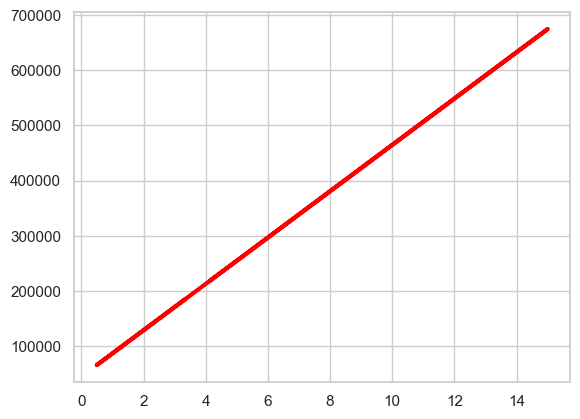

In [66]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(x_test_median_income ,model_median_income.predict(x_test_median_income) ,color='red',linewidth =3)
plt.show()

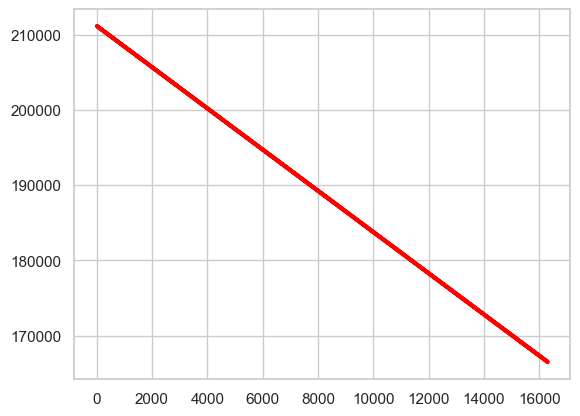

In [67]:
plt.plot(x_test_population, model_population.predict(x_test_population) ,color='red',linewidth =3)
plt.show()

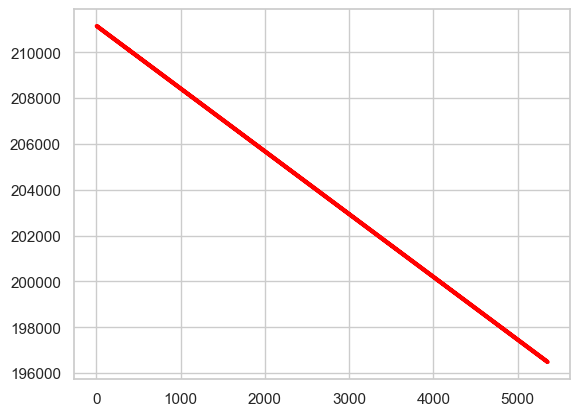

In [68]:
plt.plot(x_test_households, model_population.predict(x_test_households) ,color='red',linewidth =3)
plt.show()

##### No.7 Provide a conclusion about the goodness-of-fit, and other insights you might have (1 point)

**The predicted results obtained from all three linear regression models listed in this report are not satisfactory. To establish a more ideal predictive model, I believe the following points should be considered at least:**

1. Building a model should not solely focus on a single data variable, as the correlation between individual data variables and housing prices is not sufficiently strong.

2. When considering multiple data variables, linear regression models may not be suitable, and it is necessary to contemplate the establishment of more complex models.

3. It is essential to clean the data by removing entries that clearly defy common sense.